# Overall
This note book shows the procedure to produce the scalability performance plot from DALiuGE

In [1]:
import os, sys, string, time
from datetime import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams['xtick.labelsize'] =14
plt.rcParams['ytick.labelsize'] =14

## Schema of the dataset
    0.  user name (e.g. cwu)
    1.  facility (e.g. galaxy)
    2.  pipeline (e.g. lofar_std)
    3.  time (e.g. 2016-08-22T11-52-11/)
    4.  # of nodes
    5.  # of drops
    6.  Git commit number
    7.  unroll_time
    8.  translation_time
    9.  pg_spec_gen_time
    10. created_session_at_all_nodes_time
    11. graph_separation_time
    12. push_sub_graphs_to_all_nodes_time
    13. created_drops_at_all_nodes_time
    14. Num_pyro_connections_at_all_nodes
    15. created_pyro_conn_at_all_nodes_time
    16. triggered_drops_at_all_nodes_time
    17. Total completion time

## Load the dataset

In [2]:
csv_file = 'presult_7_Sep_2016.csv'
#csv_file = 'zero_8_Sep_2016.csv'
df = pd.read_csv(csv_file, header=None)

num_tests, num_attr = df.shape
print("In total {0} tests run and {1} attributes recorded".format(num_tests, num_attr))
# just show the first three examples
df

In total 48 tests run and 18 attributes recorded


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,cwu,galaxy,lofar_test_64x128,2016-09-06T23-33-21,60,133830,fceac646a6dd06d5c80e47787bd87dbd971374ea,10.396,4.018,0.096,0.048,2.079,1.567,1.224,-1,None,0.081,403.456
1,cwu,galaxy,lofar_test_16x32,2016-09-06T22-27-27,60,8886,fceac646a6dd06d5c80e47787bd87dbd971374ea,0.177,0.208,0.006,0.064,0.094,0.806,0.104,-1,None,0.036,402.385
2,cwu,galaxy,lofar_test_64x128,2016-09-06T23-33-08,30,133830,fceac646a6dd06d5c80e47787bd87dbd971374ea,10.410,4.017,0.095,0.024,1.988,1.285,1.402,-1,None,0.065,403.513
3,cwu,galaxy,lofar_test_32x32,2016-09-06T22-40-41,60,17078,fceac646a6dd06d5c80e47787bd87dbd971374ea,0.398,0.432,0.011,0.047,0.195,0.839,0.141,-1,None,0.041,402.506
4,cwu,galaxy,lofar_test_128x128,2016-09-06T23-48-51,30,264902,fceac646a6dd06d5c80e47787bd87dbd971374ea,33.563,8.047,0.193,0.025,4.598,2.142,3.475,-1,None,0.114,405.183
5,cwu,galaxy,lofar_test_64x128,2016-09-06T23-33-10,30,133830,fceac646a6dd06d5c80e47787bd87dbd971374ea,10.402,4.021,0.095,0.025,1.987,1.283,1.398,-1,None,0.066,403.581
6,cwu,galaxy,lofar_test_16x32,2016-09-06T22-27-22,30,8886,fceac646a6dd06d5c80e47787bd87dbd971374ea,0.177,0.196,0.006,0.041,0.077,0.592,0.090,-1,None,0.019,402.422
7,cwu,galaxy,lofar_test_32x64,2016-09-06T23-05-16,30,34150,fceac646a6dd06d5c80e47787bd87dbd971374ea,1.121,0.946,0.021,0.025,0.414,2.393,0.301,-1,None,0.028,402.691
8,cwu,galaxy,lofar_test_16x32,2016-09-06T22-27-31,60,8886,fceac646a6dd06d5c80e47787bd87dbd971374ea,0.177,0.209,0.006,0.063,0.096,0.814,0.101,-1,None,0.035,402.381
9,cwu,galaxy,lofar_test_16x16,2016-09-06T21-52-55,60,4446,fceac646a6dd06d5c80e47787bd87dbd971374ea,0.081,0.120,0.002,0.048,0.046,0.736,0.071,-1,None,0.033,402.327


## Set the filter
Show tests that have successfully completed its execution on 30 nodes (sort based on # of drops and # of relationships)

In [3]:
def filter_data(num_nodes=None, gt_num_drops=None, lt_num_drops=None, 
                git_commit=None, user=None, pipeline=None, 
                gt_test_date=None, lt_test_date=None, lt_trans_time=None, 
                gt_trans_time=None, gt_drop_create_time=None,
                gt_completion_time=None, lt_completion_time=None, filter_none=[16]):
    
    col_list = list(string.ascii_lowercase[0:18])
    rt = pd.DataFrame(df.values, columns=col_list)
    cond = []
    if (num_nodes != None):
        cond.append('e == %d' % num_nodes)
    if (gt_num_drops != None):
        cond.append('%s >= %d' % (col_list[5], gt_num_drops))
    if (lt_num_drops != None):
        cond.append('%s <= %d' % (col_list[5], lt_num_drops))
    if (lt_trans_time != None):
        cond.append('%s <= %d' % (col_list[8], lt_trans_time))
    if (gt_trans_time != None):
        cond.append('%s >= %d' % (col_list[8], gt_trans_time))
    if (lt_completion_time != None):
        cond.append('%s <= %d' % (col_list[17], lt_completion_time))
    if (gt_completion_time != None):
        cond.append('%s >= %d' % (col_list[17], gt_completion_time))
    if (git_commit != None):
        cond.append('%s == "%s"' % (col_list[6], git_commit))
    if (user != None):
        cond.append('%s == "%s"' % (col_list[0], user))
    if (pipeline != None):
        cond.append('%s == "%s"' % (col_list[2], pipeline))
    if (gt_test_date != None):
        cond.append('%s >= "%s"' % (col_list[3], gt_test_date))
    if (lt_test_date != None):
        cond.append('%s <= "%s"' % (col_list[3], lt_test_date))
    for rm in filter_none:
        cond.append('%s != "None"' % col_list[rm])
        cond.append('%s != -1' % col_list[rm])
    rt = pd.DataFrame(rt.query(' & '.join(cond)).values)
    return rt.sort_values(by=[5, 14])
#test_filter = filter_data(60, lt_num_drops=10000, lt_test_date='2016-08-29T21-00-56')
#test_filter = filter_data(user='cwu', filter_none=[17], gt_test_date='2016-08-31T00-00-56')
df = filter_data(filter_none=[6,7,8])
test_filter = filter_data(user='cwu', filter_none=[5],
                         gt_test_date='2016-08-31T00-00-56', lt_trans_time=30)
test_filter.shape
#test_filter

(48, 18)

## Plot 1
The first set of graphs show the time spend on varoius metrics when we increase the number of Drops or Drop relationships given a fixed set of nodes (e.g. 30 or 60).

After filtering as shown above, we also want to make sure all data values of our intersted columns are of "numeric" type, and we also want to sort the dataset based on the number of Drops as this plot requires

In [4]:
col_list = [5] + list(range(7, 18))
ttr = test_filter[col_list].sort_values(by=[5])
ttr[col_list] = ttr[col_list].apply(pd.to_numeric, errors='coerce')

Then, we let Pandas do the heavy-lifting of data aggregation and calculation

In [5]:
#ttr.groupby([5]).mean()

Just to make sure the above group by aggregation is correct:

Let Pandas calculate the error as well:

In [6]:
#ttr.groupby([5]).std()

Based on the above playing around, we are able to write a function to do the plotting job:

In [7]:
def plot_time_vs_drops(runs_data, num_nodes, pyro_time=False):
    """
    pyro_time: include time for establishing pyro relationships?
                default=True
    """
    col_list = [5] + list(range(7, 18))
    ttr = runs_data[col_list].sort_values(by=[5])
    ttr[col_list] = ttr[col_list].apply(pd.to_numeric, errors='coerce')
    
    yv = ttr.groupby([5]).mean()
    x = yv.index.values
    x_label = '# of Drops'
    y1 = yv.ix[:, 7:13].values
    y4 = yv.ix[:, 16:17].values
    
    ye = ttr.groupby([5]).std()
    ye1 = ye.ix[:, 7:13].values
    ye4 = ye.ix[:, 16:17].values.astype(float)

    labels_1 = ['unroll', 'translate', 'pg_spec', 'session', 'separation', 'push_graph', 'created_drop']
    marker_1 = ['o', 'v', '^', '8', 's', 'x', 'D']
    labels_2 = ['trigger', 'execution']
    marker_2 = ['+', 'D']#marker_1[0:5]
    f = plt.figure(1)
    #f.suptitle("Time cost when increasing the {1} running on {0} nodes".format(num_nodes, x_label), fontsize=17)
    ax1 = plt.subplot(111)
    ax1.set_yscale("log")
    for i in range(len(labels_1)):
        lines = plt.errorbar(x, y1[:, i], linewidth=2, label=labels_1[i], yerr=ye1[:, i],
                 marker=marker_1[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    #plt.legend(loc='best', fontsize=14)
    plt.ylabel('Seconds', fontsize=15)
    plt.xlabel(x_label, fontsize=15)
    #plt.title('Time cost', fontsize=15)
    #ax2 = plt.subplot(122)
    #ax2.set_yscale("log")
    for i in range(len(labels_2)):
        lines = plt.errorbar(x, y4[:,i], linewidth=2, label=labels_2[i], yerr=ye4[:, i],
                 marker=marker_2[i], markersize=9, markerfacecolor='none', markeredgewidth=2)
        lines[0].set_markeredgecolor(lines[0].get_color())
    orientation = 'center right' if pyro_time else 'center right'
    plt.legend(loc='best', fontsize=15)
    #plt.ylabel('Seconds', fontsize=15)
    #plt.xlabel(x_label, fontsize=15)
    #plt.title('Runtime cost', fontsize=15)


First, try 30 nodes

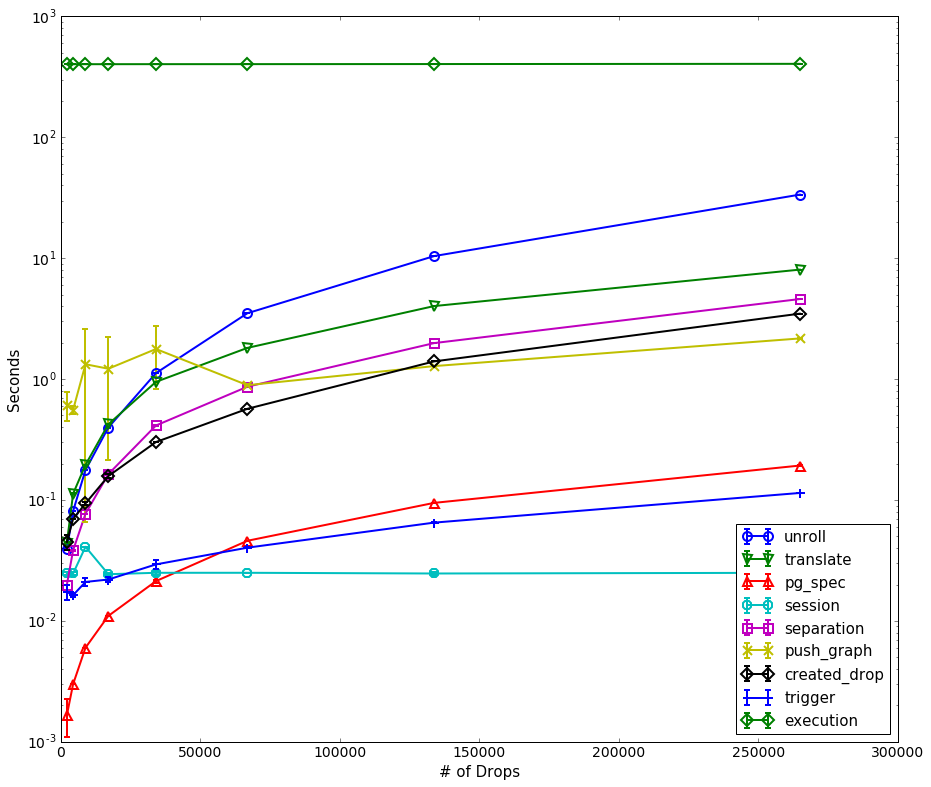

In [8]:
nb_nodes = 30
plt.rcParams['figure.figsize'] = (15.0, 13.0)
plot_time_vs_drops(filter_data(num_nodes=nb_nodes, user='cwu', filter_none=[17], 
                               gt_test_date='2016-08-31T00-00-56', lt_trans_time=20), num_nodes=nb_nodes, 
                               pyro_time=False)


Check the "accelerate rate" of the unroll and translate checkpoints

In [9]:
df_de = filter_data(num_nodes=nb_nodes, user='cwu', filter_none=[7, 8, 17])[[5,7,8]]
df_de = df_de.apply(pd.to_numeric, errors='coerce')
dfdede = df_de.groupby(5).mean()
dfdede

,7,8
5,,
2226,0.039333,0.044333
4446,0.081000,0.112667
8886,0.177000,0.195333
17078,0.397667,0.423000
34150,1.121000,0.949000
66918,3.506333,1.812000
133830,10.410000,4.018334
264902,33.557000,8.044000


In [10]:
ut = dfdede.values # ut represents "unroll" and "translate"
unroll_mean = np.mean(np.divide(ut[:,0][1:], ut[:,0][0:-1]))
trans_mean = np.mean(np.divide(ut[:,1][1:], ut[:,1][0:-1]))
print("increasing rate: unroll: {0}, translate: {1}".format(unroll_mean, trans_mean))

increasing rate: unroll: 2.66149504285, translate: 2.1161333078


Now try 60 nodes...

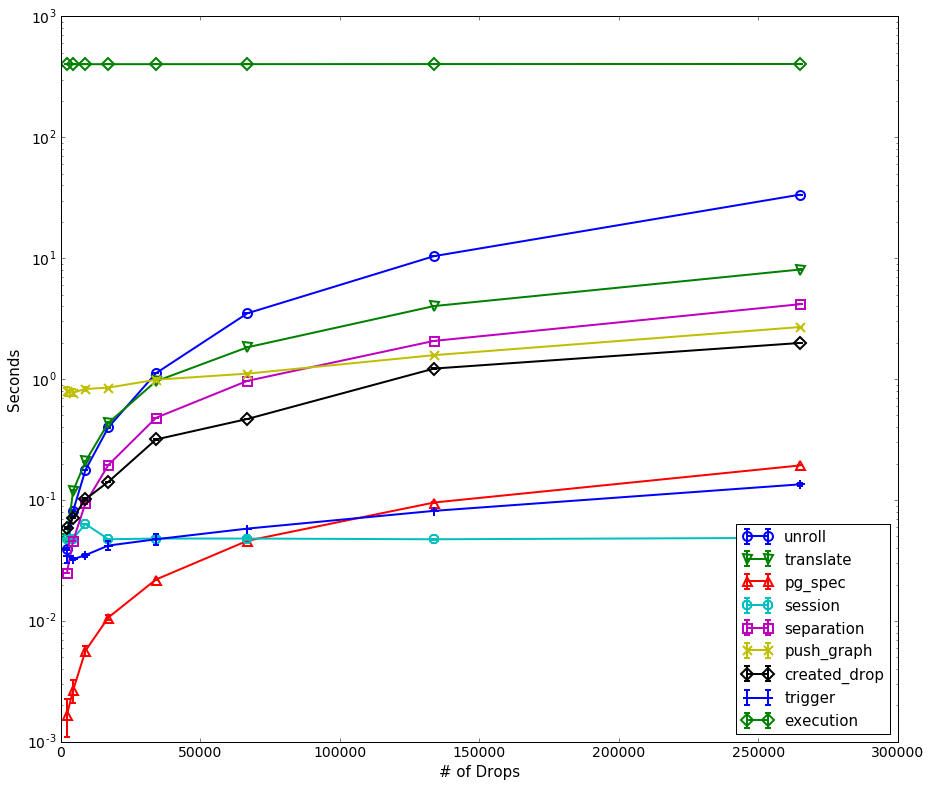

In [11]:
nb_nodes = 60
plot_time_vs_drops(filter_data(num_nodes=nb_nodes, user='cwu', filter_none=[17], 
                               gt_test_date='2016-08-31T00-00-56', lt_trans_time=20), num_nodes=nb_nodes, 
                               pyro_time=False)
plt.rcParams['figure.figsize'] = (20.0, 8.0)

## Plot 2
The association between # of Drops and # of METIS Edge-cuts under different # of Nodes


In [12]:
def plot_edgecuts_vs_drops():
    markers = itertools.cycle(('o', 'v', '.', 'o', '*'))
    
    nb_drops = [499, 220, 348, 690, 1202, 2226, 4446, 8886, 17078, 34150, 66918, 133830, 264902]
    edge_cuts_30 = [593,
                 1038,
                 1151,
                 2034,
                 3584,
                 4192,
                 6475,
                 8531,
                 18927,
                 18608,
                 30135,
                 58615,
                 116436]
    edge_cuts_60 = [1035,
                 1819,
                 2552,
                 3045,
                 4077,
                 7689,
                 9545,
                 13333,
                 25918,
                 38970,
                 83067,
                 61884,
                 324568]
    ls = plt.plot(nb_drops, edge_cuts_30, label='30 nodes edgecuts', marker=markers.next(), 
                 markersize=10, markeredgewidth=2, markerfacecolor='none', linewidth=3, color='r')
    ls[0].set_markeredgecolor(ls[0].get_color())
    ls = plt.plot(nb_drops, edge_cuts_60, label='60 nodes edgecuts', marker=markers.next(), 
                 markersize=10, markeredgewidth=2, markerfacecolor='none', linewidth=3, color='y')
    ls[0].set_markeredgecolor(ls[0].get_color())
    plt.ylabel('# of METIS Edge cuts', fontsize=15)
    plt.xlabel('# of Drops', fontsize=15)
    plt.legend(loc='upper left', fontsize=15)
    

## Plot 3
the time spend on varoius metrics when we increase the # of nodes given a fixed set of Drops. Since the level of # of nodes is not so many, it is best to use a bar chart to illustrate this.

In [13]:
df30 = filter_data(filter_none=[17], gt_test_date='2016-08-31T00-00-56', 
                   gt_num_drops=None, num_nodes=30, user='cwu', 
                   gt_completion_time=0, lt_trans_time=100)[[5, 17]]
df30

,5,17
0,2226,402.278
1,2226,402.277
2,2226,402.347
3,4446,402.463
4,4446,402.304
5,4446,402.318
6,8886,402.422
7,8886,402.418
8,8886,402.388
9,17078,402.446


In [14]:
df60 = filter_data(filter_none=[17], gt_test_date='2016-08-31T00-00-56', 
                   gt_num_drops=None, num_nodes=60, user='cwu', 
                   gt_completion_time=0, lt_trans_time=100)[[5, 17]]
df60

,5,17
0,2226,402.487
1,2226,402.424
2,2226,402.368
3,4446,402.327
4,4446,402.304
5,4446,402.406
6,8886,402.385
7,8886,402.381
8,8886,402.489
9,17078,402.506


In [15]:
dt1 = df30[17].astype(float)
df30_1 = pd.DataFrame({'17_30': list(dt1)}, index=list(df30[[5]].values[:,0]))
df30_mean = df30_1.groupby(df30_1.index).mean()
df30_err = df30_1.groupby(df30_1.index).std()
df30_mean

,17_30
2226,402.300667
4446,402.361667
8886,402.409333
17078,402.486667
34150,402.712000
66918,402.898667
133830,403.527333
264902,405.190000


In [16]:
dt2 = df60[17].astype(float)
df60_1 = pd.DataFrame({'17_60': list(dt2)}, index=list(df60[[5]].values[:,0]))
df60_mean = df60_1.groupby(df60_1.index).mean()
df60_err = df60_1.groupby(df60_1.index).std()
df60_mean

,17_60
2226,402.426333
4446,402.345667
8886,402.418333
17078,402.475667
34150,402.668000
66918,402.828667
133830,403.453667
264902,403.994000


In [17]:
both_df = df30_mean.join(df60_mean).sort_index()
both_df_err = df30_err.join(df60_err).sort_index()
both_df

,17_30,17_60
2226,402.300667,402.426333
4446,402.361667,402.345667
8886,402.409333,402.418333
17078,402.486667,402.475667
34150,402.712000,402.668000
66918,402.898667,402.828667
133830,403.527333,403.453667
264902,405.190000,403.994000


In [18]:
both_df_err

,17_30,17_60
2226,0.040129,0.059534
4446,0.088036,0.053501
8886,0.018583,0.061232
17078,0.042063,0.026274
34150,0.021000,0.031225
66918,0.010599,0.010214
133830,0.048128,0.006807
264902,0.010440,0.026000


In [19]:
nodes_30 = both_df[['17_30']].values.flatten()
nodes_30_err = both_df_err[['17_30']].values.flatten()

In [20]:
nodes_60 = both_df[['17_60']].values.flatten()
nodes_60_err = both_df_err[['17_60']].values.flatten()

In [21]:
x_tick_labels = [str(x) + ' Drops' for x in sorted(both_df.index.values)]
x_tick_labels

['2226 Drops',
 '4446 Drops',
 '8886 Drops',
 '17078 Drops',
 '34150 Drops',
 '66918 Drops',
 '133830 Drops',
 '264902 Drops']

In [22]:
N = len(nodes_30)
N

8

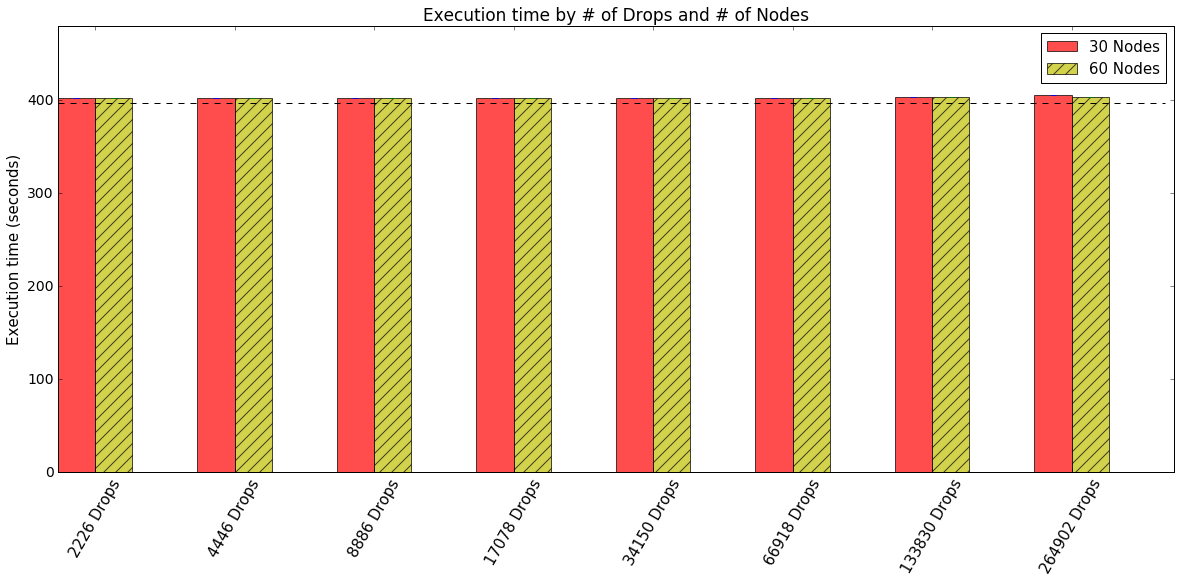

In [23]:
width = 0.4
ind = np.arange(N) * 1.5
b1 = plt.bar(ind, nodes_30, width, color='r', yerr=nodes_30_err, alpha=0.7)
b2 = plt.bar(ind + width, nodes_60, width, color='y', yerr=nodes_60_err, hatch="//", alpha=0.7)
plt.plot([0, ind[-1] + 3.5 * width], [397, 397], color='k', linestyle='--', linewidth=1)

plt.ylim((0, 480))
plt.xticks(ind + width, x_tick_labels, fontsize=15, rotation=60)
plt.ylabel('Execution time (seconds)', fontsize=15)
plt.title('Execution time by # of Drops and # of Nodes', fontsize=17)
plt.legend((b1, b2), ('30 Nodes', '60 Nodes'), loc='upper right', fontsize=15)

Plot the overhead per Drop

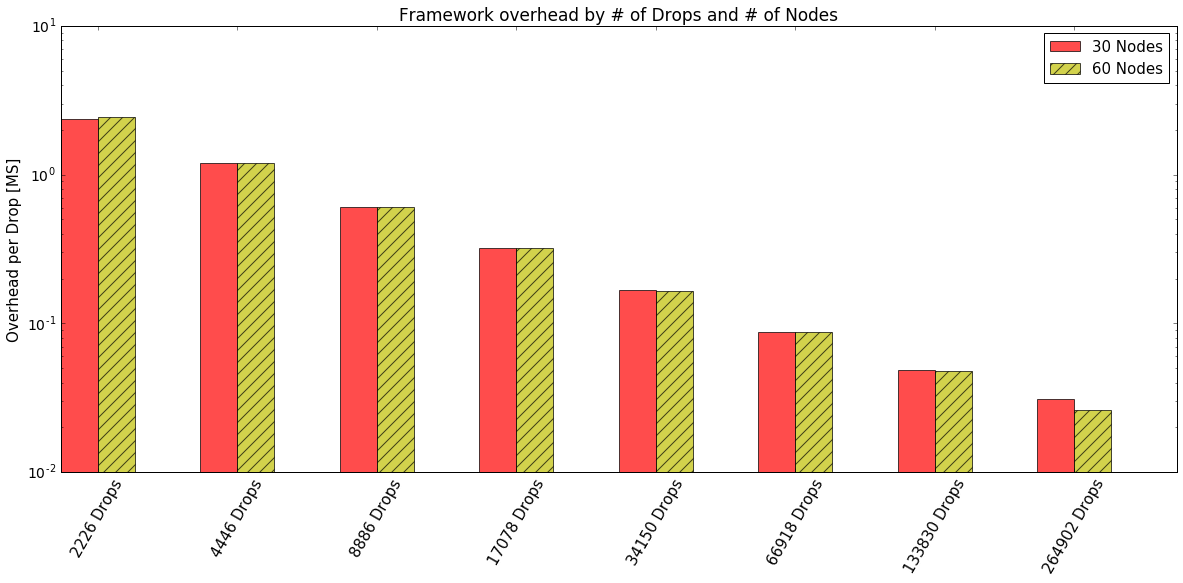

In [24]:
bda = (both_df - 397).values
eff_30 = np.divide(bda[:,0], both_df.index.values)
eff_60 = np.divide(bda[:,1], both_df.index.values)

width = 0.4
ind = np.arange(N) * 1.5
plt.yscale('log')
b1 = plt.bar(ind, eff_30 * 1e3, width, color='r', alpha=0.7)
b2 = plt.bar(ind + width, eff_60 * 1e3, width, color='y',hatch="//", alpha=0.7)
#plt.plot([0, ind[-1] + 3.5 * width], [397, 397], color='k', linestyle='--', linewidth=1)

#plt.ylim((0, 480))
plt.xticks(ind + width, x_tick_labels, fontsize=15, rotation=60)
plt.ylabel('Overhead per Drop [MS]', fontsize=15)
plt.title('Framework overhead by # of Drops and # of Nodes', fontsize=17)
plt.legend((b1, b2), ('30 Nodes', '60 Nodes'), loc='upper right', fontsize=15)

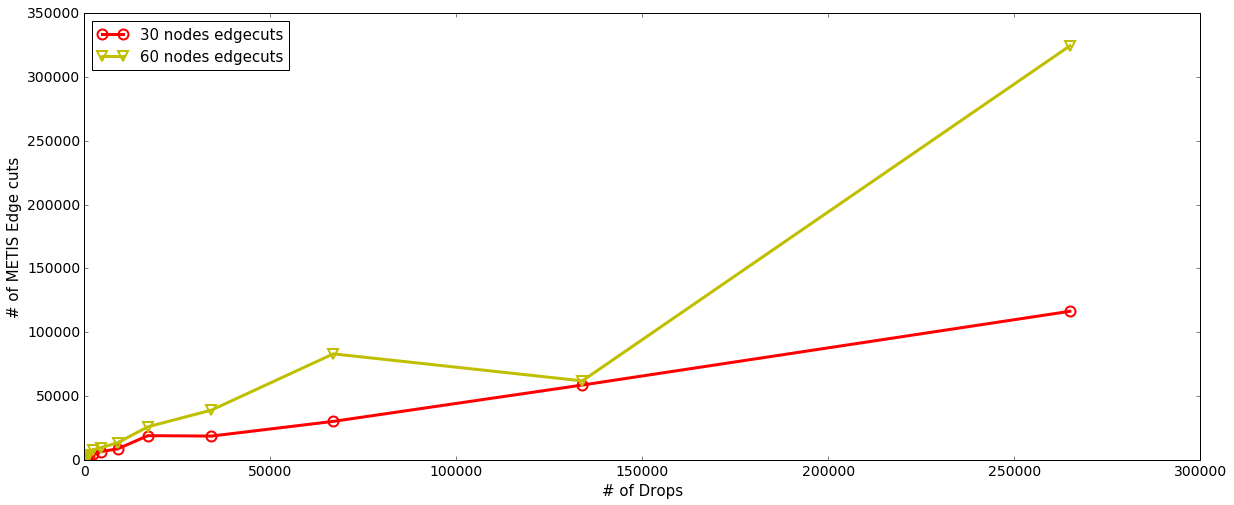

In [25]:
plot_edgecuts_vs_drops()

## Plot 4 - Event timeseries
Plot the event/message intensity over the time axis (time series of events). 
First for input, we need three log files: xx_execState.log, xx_session_running.log, xx_state.log

Step 1 - convert state into a Pandas dataframe (state event type, time)

In [26]:
dt_pattern = '%Y-%m-%dT%H:%M:%S,%f'
def get_timestamp(date_time):
    """
    microsecond precision
    """
    epoch = time.mktime(time.strptime(date_time, dt_pattern))
    return epoch
    #return datetime.strptime(date_time, dt_pattern).microsecond / 1e6 + epoch

In [27]:
ex_st_file = 'event_logs/64x128_execState.log'
st_file = 'event_logs/64x128_state.log'
ss_file = 'event_logs/64x128_session_running.log'

def go_thru_logs(st_file, session=False):
    ret = []
    with open(st_file) as esf:
        for line in esf.readlines():
            line = line.strip()
            s_sp = line.split()
            tstr = s_sp[0].split(':')[1] + 'T' + s_sp[1]
            ts = int(get_timestamp(tstr))
            if (session):
                ret.append(ts)
            else:
                node = int(line.split('/')[1])
                event = int(s_sp[-1])
                ret.append((ts, node, event))
    if (session):
        return max(ret)
    else:
        return ret

In [28]:
dst = go_thru_logs(st_file)
aest = go_thru_logs(ex_st_file)
ets = [dst, aest]

In [29]:
stt = go_thru_logs(ss_file, True)

In [30]:
def plot_event_timesries(ets, labels, stt, filters):
    """
    ets: a list of event numpy arrays, for each event array, the first column is the absoluate timestamp
    labels: a list of event labels/types
    stt: start time (integer)
    """
    bbmm = 1000
    tmp = []
    for a in ets:
        b = np.asarray(a)
        b0 = b[:,0] - stt
        bmin = np.min(b0)
        tmp.append((b, b0, bmin))
        bbmm = bmin if (bmin < bbmm) and (bmin < 0) else bbmm
        
    colors = itertools.cycle(('b', 'r', 'g'))
    max_end = 0
    for i, (b, b0, bmin) in enumerate(tmp):
        if (bbmm < 0):
            b0 -= bbmm
        fi = filters[i]
        if (fi is not None):
            x = b[:,2]
            b0 = b0[np.where(x == fi)] # each element is a relative timestamp (not an interval)
        ttt = np.max(b0)
        if ttt > max_end:
            max_end = ttt
        bc = np.bincount(b0)
        ii = np.nonzero(bc)[0]
        tt = zip(ii,bc[ii])
        xy = np.asarray(tt)
        x = xy[:,0]
        y = xy[:,1]
        plt.semilogy(x, y, label=labels[i], color=colors.next(), linewidth=2)
    plt.grid(True)
    plt.xlabel('Time in seconds', fontsize=15)
    plt.ylabel('# of events per second', fontsize=15)
    plt.legend(loc='upper right', fontsize=15)
    plt.title('Rate of Events/Status Changes over Time (133,830 Drops on 60 nodes)', fontsize=17)
    return max_end

489

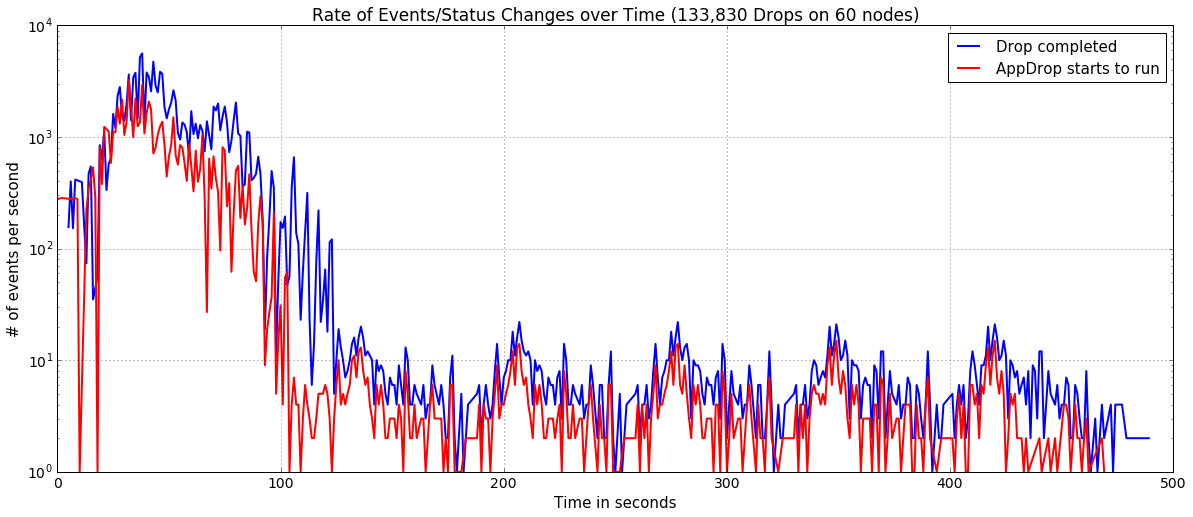

In [31]:
filters = [None, 1]
labels = ['Drop completed', 'AppDrop starts to run']
max_end = plot_event_timesries(ets, labels, stt, filters)
max_end

## Plot 5 - Event heatmap
In this type of plot, the color map represents the number of events, the X axis is the time, the Y axis is the compute node

In [32]:
len(aest)

134148

In [33]:
len(dst)

133830

In [34]:
def calc_event_heatmap(ets, labels, stt, filters, num_nodes):
    """
    ets: a list of event numpy arrays, for each event array, the first column is the absoluate timestamp
    labels: a list of event labels/types
    stt: start time (integer)
    """
    bbmm = 1000
    tmp = []
    for a in ets:
        b = np.asarray(a)
        b0 = b[:,0] - stt
        bmin = np.min(b0)
        tmp.append((b, b0, bmin))
        bbmm = bmin if (bmin < bbmm) and (bmin < 0) else bbmm
    matrix = np.zeros((num_nodes - 1, max_end + 1), dtype=np.float)
    for i, (b, b0, bmin) in enumerate(tmp):
        if (bbmm < 0):
            b0 -= bbmm
        fi = filters[i]
        b1 = b[:,1]
        if (fi is not None):
            x = b[:,2]
            ind = np.where(x == fi)
            b0 = b0[ind] # each element is a relative timestamp (not an interval)
            b1 = b1[ind]
        #print(len(b0), len(b1))
        for j, bt in enumerate(b0):
            matrix[b1[j] - 1][bt] += 1
    
    return matrix

In [35]:
mat = calc_event_heatmap(ets, labels, stt, filters, 60)

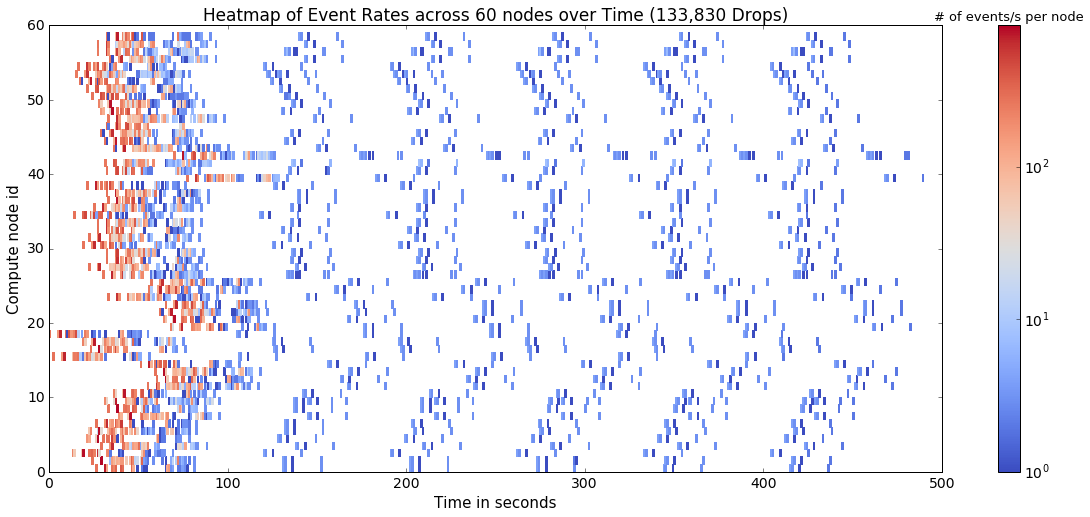

In [36]:

plt.pcolor(mat, cmap=plt.cm.coolwarm, norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
#cbar.ax.xaxis.tick_top()
cbar.ax.xaxis.set_label_position('top')
cbar.ax.set_xlabel('# of events/s per node', fontsize=13)
plt.ylabel('Compute node id',fontsize=15)
plt.xlabel('Time in seconds', fontsize=15)
plt.title('Heatmap of Event Rates across 60 nodes over Time (133,830 Drops)', fontsize=17)

In the above plot, the X axis is time, the Y axis is the compute node identifier. The colorbar represents the # of events at that time (second) on one of the 60 compute nodes.

In [37]:
csv_file = 'islands.csv'
#csv_file = 'zero_8_Sep_2016.csv'
df = pd.read_csv(csv_file, header=None)

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,cwu,galaxy,lofar_test_256x256,2016-09-15T17-18-51,150,1054086,eccbd1a96a9d790eede8a01b055f05067e216184,743.727,33.112,7.863,0.023,120.004,16.248,4.287,-1,None,0.598,406.632
1,cwu,galaxy,lofar_test_256x256,2016-09-16T10-37-56,150,1054086,eccbd1a96a9d790eede8a01b055f05067e216184,789.124,30.346,0.993,0.115,33.781,11.180,7.275,-1,None,0.743,410.039


In [39]:
dfv = df[[7,8,9,10,11,12,13,16,17]].values

In [40]:
df2 = pd.DataFrame(dfv, columns=['Unroll', 
                                 'Translate', 'Gen pgspec', 
                                 'Create session', 'Separate graph', 
                                 'Push graph', 'Create drop',
                                'Trigger drop', 'Execution time'], index=['5 Islands', '1 Island'])

In [41]:
df2

,Unroll,Translate,Gen pgspec,Create session,Separate graph,Push graph,Create drop,Trigger drop,Execution time
5 Islands,743.727,33.112,7.863,0.023,120.004,16.248,4.287,0.598,406.632
1 Island,789.124,30.346,0.993,0.115,33.781,11.180,7.275,0.743,410.039


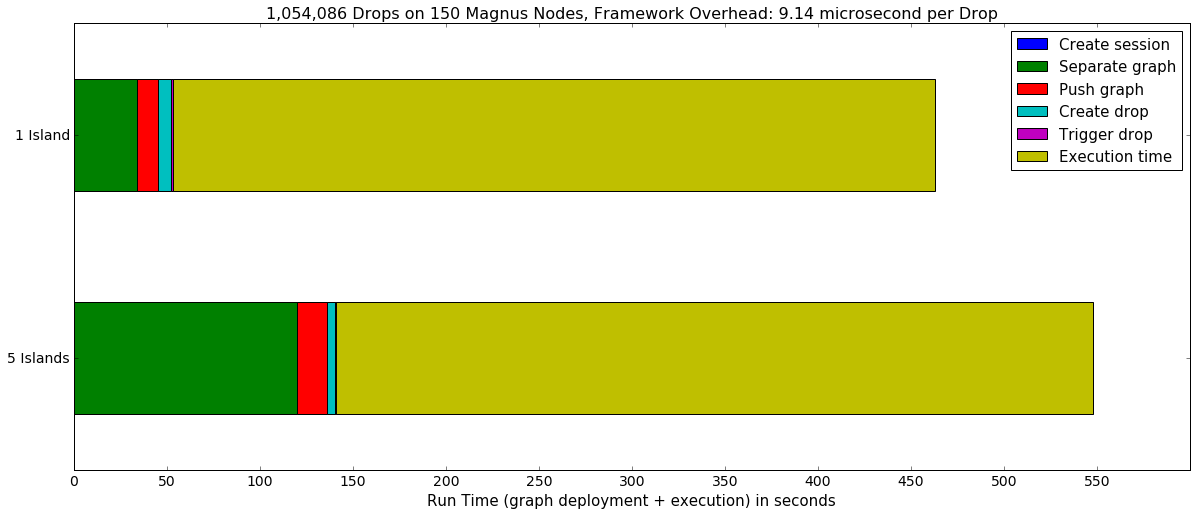

In [42]:
eff = (df2.iloc(0)[0][-1] - 397.0) / 1054086.0 * 1e6
a = df2[[3,4,5,6,7,8]].plot.barh(stacked=True)
a.set_title("1,054,086 Drops on 150 Magnus Nodes, Framework Overhead: %.2f microsecond per Drop" % eff, fontsize=16)
a.legend(loc='best', fontsize=15)
a.set_xlabel("Run Time (graph deployment + execution) in seconds", fontsize=15)
a.set_xticks(list(np.arange(12) * 50))

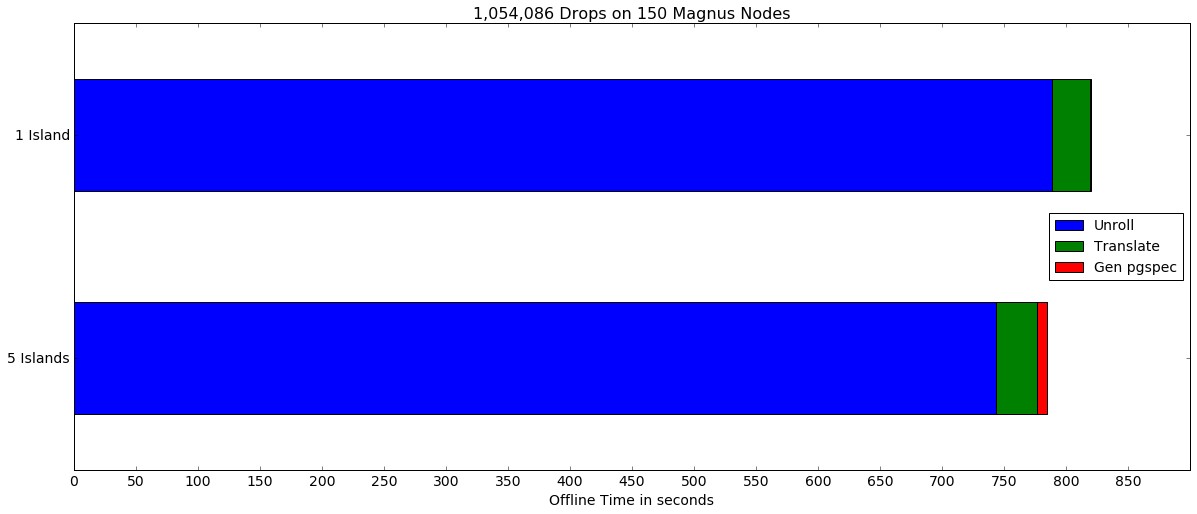

In [43]:
a = df2[[0,1,2]].plot.barh(stacked=True)
a.set_title("1,054,086 Drops on 150 Magnus Nodes", fontsize=16)
a.legend(loc=7, fontsize=14)
a.set_xlabel("Offline Time in seconds", fontsize=14)
a.set_xticks(list(np.arange(18) * 50))